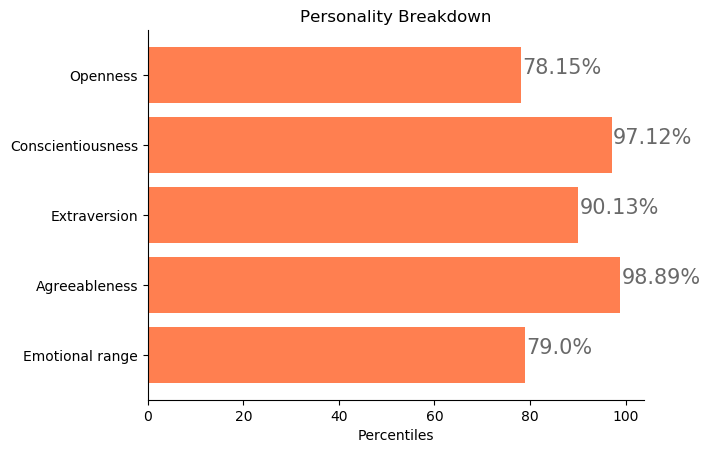

In [57]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import Image, HTML, display

FILE_NAME = 'client1_output.json'

with open(FILE_NAME) as file:
    data = json.load(file)

categories = [personality['name'] for personality in data['personality']]
percentiles = [personality['percentile'] * 100 for personality in data['personality']]

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(categories))

ax.barh(categories, percentiles, align='center', color='coral')
ax.set_yticks(y_pos)
ax.set_yticklabels(categories)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentiles')
ax.set_title('Personality Breakdown')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i, patch in enumerate(ax.patches):
    # get_width pulls left or right; get_y pushes up or down
    ax.text(
        patch.get_width()+.3, patch.get_y()+.38,
        f'{round(percentiles[i], 2)}%', fontsize=15, color='dimgrey')

plt.show()

In [61]:
CLIENT_FILE_NAME = 'clients.csv'
PERSONALITY_FILE_NAME = 'client{0}_output.json'

df = pd.read_csv(CLIENT_FILE_NAME)

personalities = []
for index in range(3):
    with open(PERSONALITY_FILE_NAME.format(index + 1)) as file:
        personalities.append(json.load(file))

opennesses = [data['personality'][0]['percentile'] for data in personalities]
extraversions = [data['personality'][2]['percentile'] for data in personalities]

df['openness'] = opennesses
df['extraversion'] = extraversions

df['match'] = (df['openness'] + df['extraversion']) / 2
df['match'] = (df['match'] * 100).round(2)
percentages = [f'{value}%' for value in df['match']]
df['match'] = percentages

columns_to_show = ['name', 'match', 'last_invitation', 'preferred_contact']
trimmed = df[columns_to_show]
trimmed = trimmed.rename(
    {'name': 'Name', 'match': 'Match',
     'last_invitation': 'Last Invitation',
    'preferred_contact': 'Preferred Contact'}, axis=1)

HTML(trimmed.to_html(escape=False, index=False))

Name,Match,Last Invitation,Preferred Contact
Jim Taylor,84.14%,2018-09-16,416-903-2845
Michelle Penner,37.31%,2017-06-25,647-890-2183
Shaun Chen,80.53%,2015-03-18,528-382-9102
